In [1]:
import numpy as np

* Unitary Matrix: A unitary matrix is a square matrix of complex numbers, whose inverse is equal to its conjugate transpose. Alternatively, the product of the unitary matrix and the conjugate transpose of a unitary matrix is equal to the identity matrix. This also means the conjugate transpose is same as its inverse.
* Non-Singular Matrix:The determinant of a non singular matrix is a a non zero value. For a square matrix A = [abcd]
, the condition of it being a non singular matrix is|A| =ad - bc ≠ 0.  
* Invertible Matrix: The matrix whose inverse matrix can be computed, is called an invertible matrix. The inverse of a matrix A is A-1 = Adj A/|A|.  
* Conjugate Matrix: The conjugate matrix of a given matrix is obtained by replacing the corresponding elements of the given matrix, with their complex conjugates.  
* Transpose Matrix: The transpose of a matrix A is represented as AT, and the transpose of a matrix is obtained by changing the rows into columns and columns into rows for a given matrix.  
* Orthogonal Matrix: If the product of a matrix and its transpose is an identity matrix, then it is called an orthogonal matrix. A.AT = I.  
* Hermitian Matrix: A hermitian matrix is a square matrix, which is equal to its conjugate transpose matrix. The non-diagonal elements of a hermitian matrix are all complex numbers. A=¯AT
.

Unitary Matrix  
https://www.cuemath.com/algebra/unitary-matrix/

In [16]:
A = np.array([
  [1/np.sqrt(2), 1/np.sqrt(2)], 
  [1j/np.sqrt(2), -1j/np.sqrt(2)]
  ])

A_conjugate = np.conjugate(A)
A_conjugate.T @ A

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

Computing SVD

In [17]:
import numpy as np

X = np.random.rand(5, 3) # Create random data matrix
U, S, V = np.linalg.svd(X, full_matrices=True) # Full SVD
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False) # Economy SVD

Frobenius Norm

The Frobenius norm is a matrix norm of an m x n matrix A, defined as the square of the sum of the absolute squares of its elements.  
* https://mathworld.wolfram.com/FrobeniusNorm.html  
* https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [25]:
A = np.array([[1, 2], [3, 4]])
frobenius_norm = np.linalg.norm(A, 'fro')
frobenius_norm

5.477225575051661

Dyadic (Outer Product)
* https://math.fandom.com/wiki/Dyadic
* https://numpy.org/doc/stable/reference/generated/numpy.outer.html

The outer product of two column vectors A and B is A @ B.T

In [13]:
import numpy as np

A = np.array(['a', 'b', 'c'], dtype=object)
B = np.array([1, 2, 3])
outer = np.outer(A, B)
outer

array([['a', 'aa', 'aaa'],
       ['b', 'bb', 'bbb'],
       ['c', 'cc', 'ccc']], dtype=object)

Dyadic Sum

In [17]:
import numpy as np

A = np.array([[1, 2], [3, 4]], dtype=object)
B = np.array([[5, 6], [7, 8]])
Diag = np.array([[2, 0], [0, 3]])
A @ Diag @ B

array([[52, 60],
       [114, 132]], dtype=object)

In [18]:
dyadic_sum = 2 * np.outer(A[:, 0], B.T[:, 0]) + 3 * np.outer(A[:, 1], B.T[:, 1])
dyadic_sum

array([[52, 60],
       [114, 132]], dtype=object)

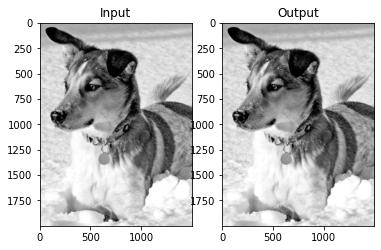

In [126]:
import cv2
import matplotlib.pyplot as plt

A = cv2.imread("./data/dog.jpg") # BGR
X = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY) # gray
plt.subplot(121),plt.imshow(A, cmap = 'gray'),plt.title('Input')
plt.subplot(122),plt.imshow(X, cmap = 'gray'),plt.title('Output')
plt.show()

In [129]:
import numpy as np

u, s, vh = np.linalg.svd(X, full_matrices=False)
smat = np.diag(s)

In [130]:
{'u': u.shape, 's': s.shape, 'vh(V.T)': vh.shape, 'smat': smat.shape}

{'u': (2000, 1500),
 's': (1500,),
 'vh(V.T)': (1500, 1500),
 'smat': (1500, 1500)}

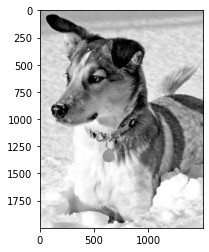

In [132]:
rec = u @ smat @ vh
plt.imshow(rec, cmap='gray')

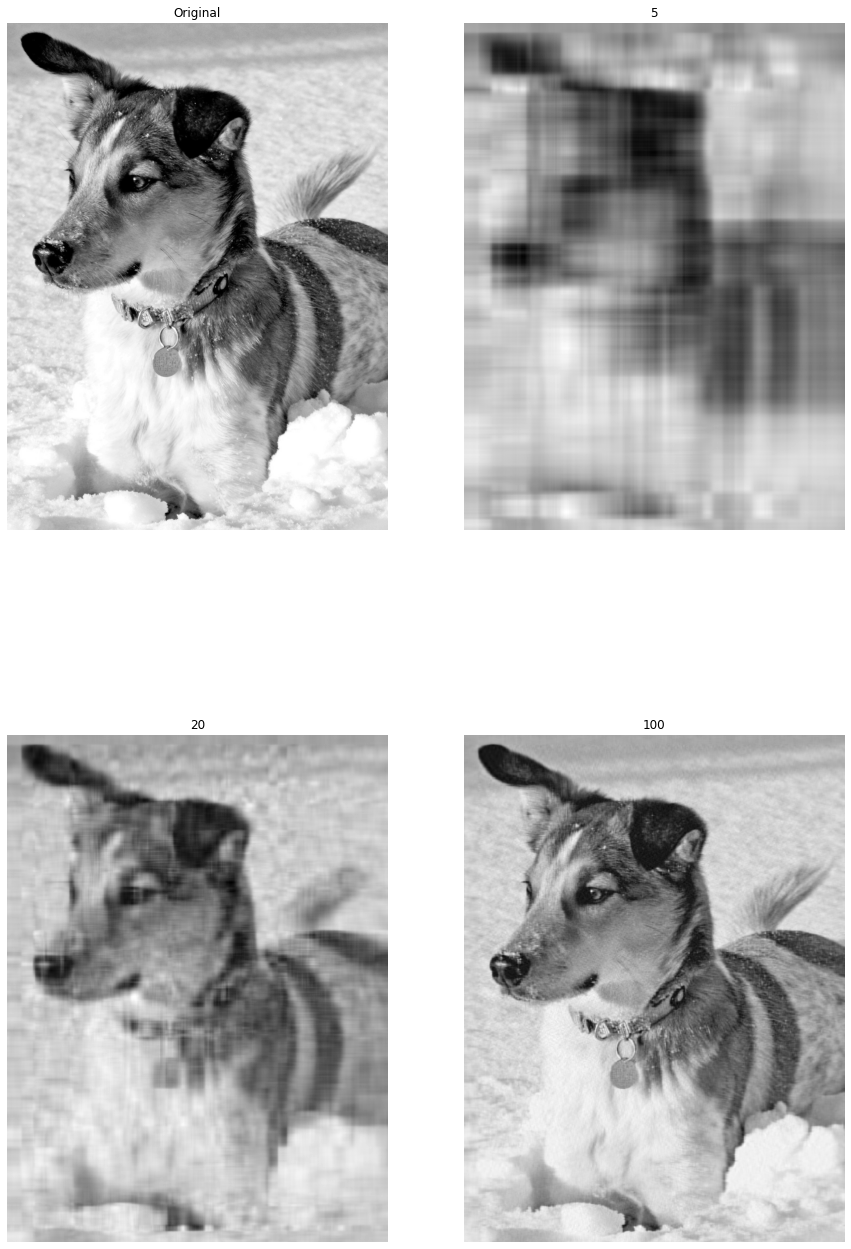

In [141]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 24))

axis = axes[0][0]
axis.imshow(A, cmap='gray')
axis.set_title('Original')
axis.axis('off')

i = 1

for r in [5, 20, 100]:
  Xapprox = u[:, :r] @ smat[:r, :r] @ vh[:r, :]
  axis = axes[i//2][i%2]
  axis.imshow(Xapprox, cmap='gray')
  axis.set_title(str(r))
  axis.axis('off')

  i += 1

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x1c191955ac0>])

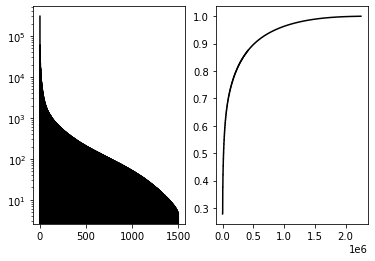

In [144]:
plt.subplot(121), plt.semilogy(smat, 'k')
plt.subplot(122), plt.plot(np.cumsum(smat) / np.sum(smat), 'k')